## Data Preparation

#### Import and load image

In [1]:
import cv2
import numpy as np

In [5]:
image = cv2.imread("download.jpg")

In [22]:
image.shape

(240, 281, 3)

In [23]:
cv2.imshow('240*281*3 image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

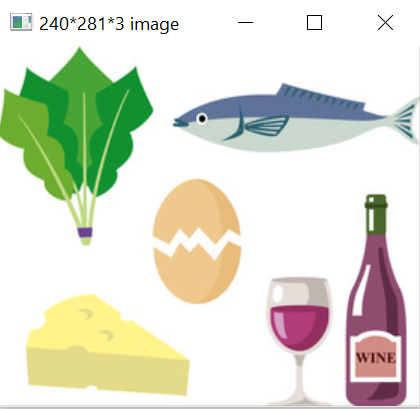

#### grayscale

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [37]:
gray.shape

(240, 281)

#### Blur

In [10]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [41]:
cv2.imshow('240*281 gray then blur',np.hstack([gray,blurred]))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### show

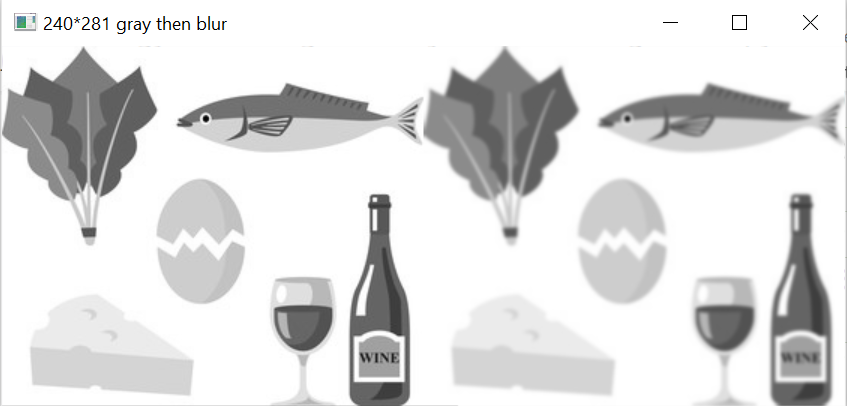

## A. SIMPLE THRESHOLDING

#### Threshold and Inverse Threshold

In [12]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

In [42]:
thresh.shape

(240, 281)

In [43]:
cv2.imshow("240*281 blur to thre and Inv", np.hstack([blurred,thresh,threshInv]))
cv2.waitKey(0)
cv2.destroyAllWindows()

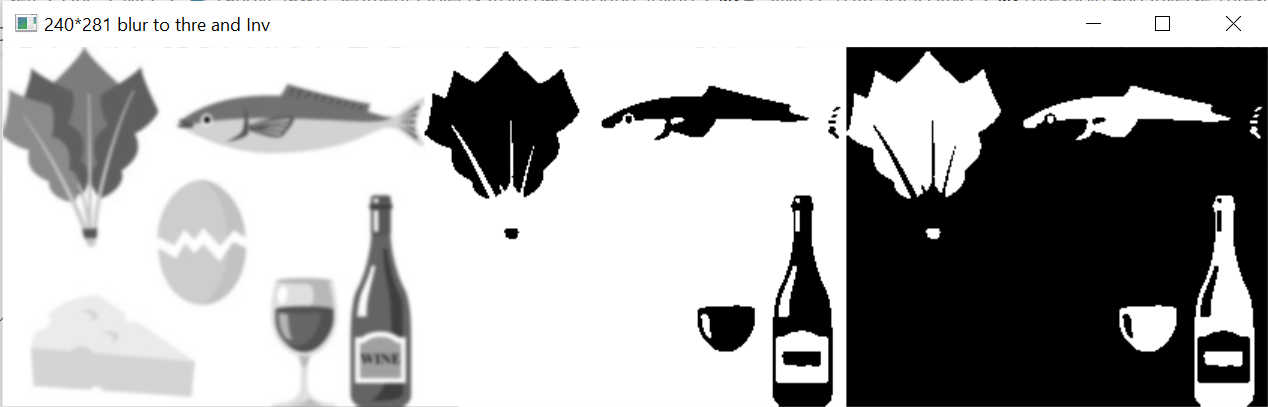

#### use threshInv as mask to extract the foreground

In [15]:
foreground = cv2.bitwise_and(image, image, mask = threshInv)

In [28]:
foreground.shape

(240, 281, 3)

In [21]:
cv2.imshow("left is image right is foreground", np.hstack([image,foreground]))
cv2.waitKey(0)
cv2.destroyAllWindows()

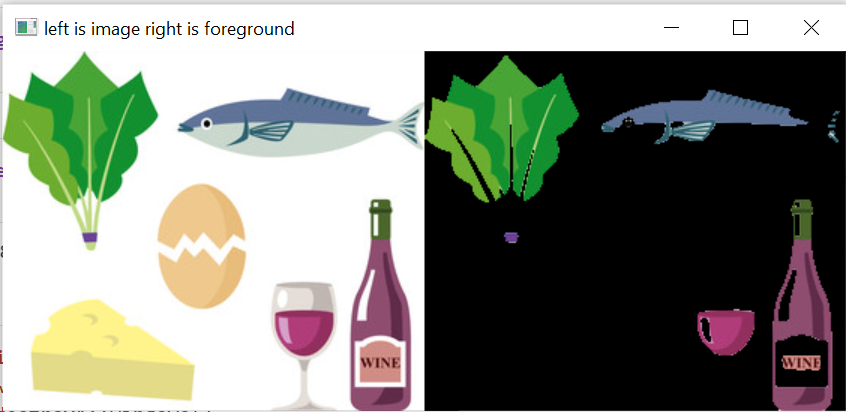

## B. ADAPTIVE THRESHOLDING

#### Mean Thresholding

In [29]:
meanthresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               11, 
                               4
)

#### Gaussian Thresholding

In [33]:
gaussianthresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               15, 
                               3
)

#### show

In [44]:
cv2.imshow("240*281 blur to meanthre & gaussianthre", np.hstack([blurred,meanthresh,gaussianthresh]))
cv2.waitKey(0)
cv2.destroyAllWindows()

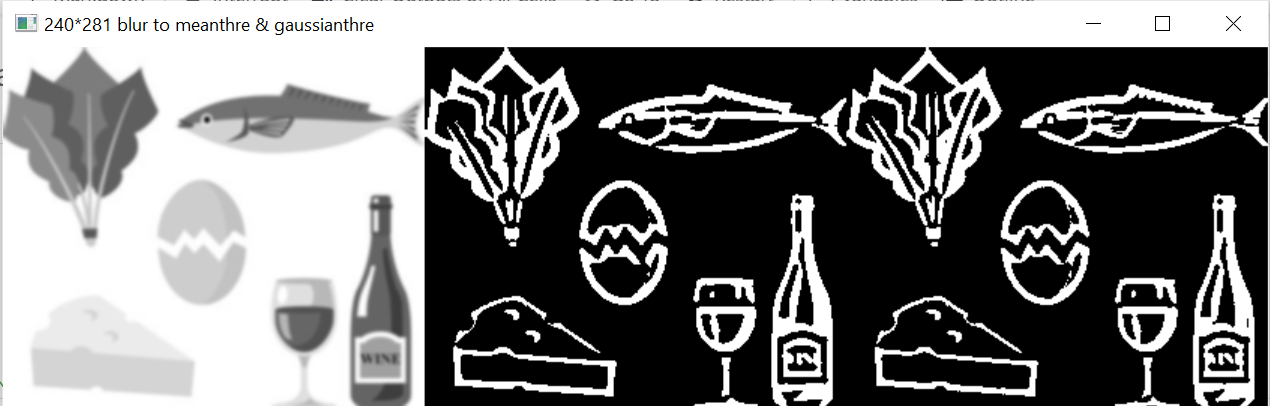

#### use Gausssian Thresholding to extract foreground

In [45]:
foregroundgaussian = cv2.bitwise_and(image, image, mask = gaussianthresh)

#### Show

In [46]:
cv2.imshow("left is image right is foregroundgau", np.hstack([image,foregroundgaussian]))
cv2.waitKey(0)
cv2.destroyAllWindows()

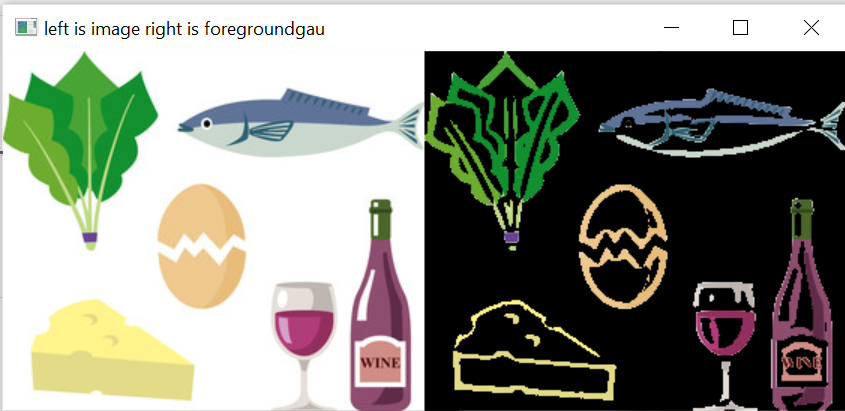

## C. OTSU THRESHOLDING

In [47]:
import mahotas

##### Find the optimal threshold of the image - Use OTSU

In [48]:
T = mahotas.thresholding.otsu(blurred)

T

181

#### Apply threshold

- Copy the image

In [49]:
threshotsu = image.copy()

- binarize

In [50]:
threshotsu[threshotsu > T] = 255

In [51]:
threshotsu[threshotsu < 255] = 0

- Invert the thresholding

In [52]:
threshotsu = cv2.bitwise_not(threshotsu)

#### Show

In [53]:
cv2.imshow("left is image right is otsu", np.hstack([image,threshotsu]))
cv2.waitKey(0)
cv2.destroyAllWindows()

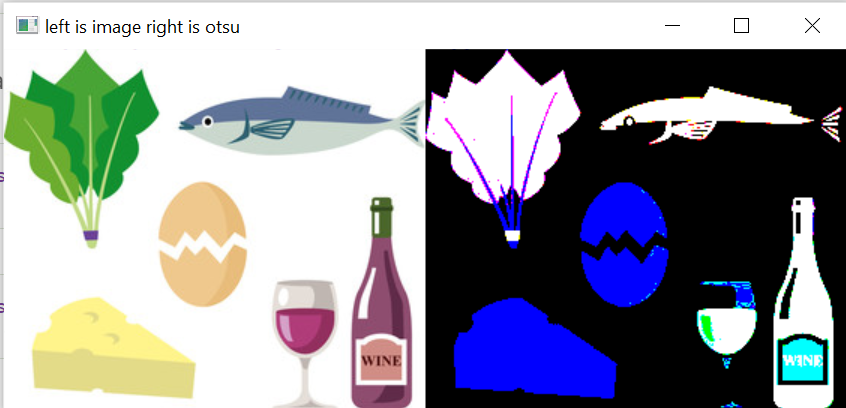

## D. RIDDLER-CALVARD THRESHOLDING

##### Find the optimal threshold of the image - Use OTSU

In [54]:
T_RC = mahotas.thresholding.rc(blurred)

T_RC

181.53537095365343

#### Apply threshold

- Copy the image

In [55]:
thresh_RC = image.copy()

- binarize

In [56]:
thresh_RC[thresh_RC > T_RC] = 255

thresh_RC[thresh_RC < 255] = 0

- Invert the thresholding

In [57]:
thresh_RC = cv2.bitwise_not(thresh_RC)

#### Show

In [58]:
cv2.imshow("left is image right is rc", np.hstack([image,thresh_RC]))
cv2.waitKey(0)
cv2.destroyAllWindows()

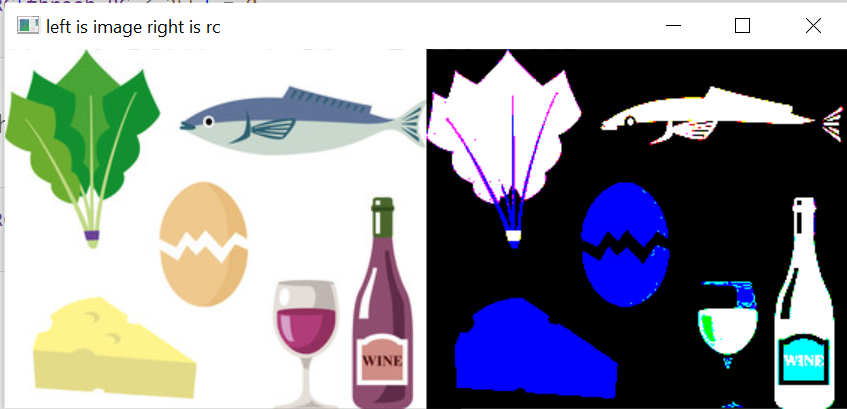

***I think in this case Foreground extraction using Gaussian has the best result.***